## Notebook by Ankan Roy - Computer Science (Machine Learning) major at the University of Maryland, College Park
## Instructors -  Dr. Tomohiro Oda, Srija Chakraborty

### Task 1:

Create a time series of global CO2 emissions using ACOS (Atmospheric CO2 Observations from Space) Lite files provided by the GOSAT/TANSO-FTS satellite.

TANSO-FTS measures the radiance of solar shortwave infrared spectra (SWIR) reflected on Earth's surface. CO2 column density is primarily obtained from the less temperature-dependent absorption lines in the 1.6 µm region, with the option to use the 2.0 µm region for retrieval.

In [1]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx
import os

In [2]:
# Variables that can be extracted from an example netCDF file

file_path = '/Volumes/Seagate Backup Plus Drive/USRA/ACOS/reference.nc4'
data = Dataset(file_path, 'r')

print("Variables in the NetCDF file:")
for var_name in data.variables:
    print(var_name)

Variables in the NetCDF file:
sounding_id
levels
bands
date
latitude
longitude
time
solar_zenith_angle
sensor_zenith_angle
xco2_quality_flag
source_files
file_index
warn_level
xco2
xco2_uncertainty
xco2_apriori
pressure_levels
co2_profile_apriori
xco2_averaging_kernel
pressure_weight


In [3]:
# Dataset: ACOS GOSAT/TANSO-FTS Level 2 bias-corrected XCO2 and other select fields from the full-physics retrieval aggregated as daily files V7.3
# Download Method: Get Original Files
# Date Range: 2009-04-21 to 2016-06-01
# Format: netCDF

# List to store DataFrames for each file
dfs = []

# Iterate through each file in the directory
for filename in os.listdir("/Volumes/Seagate Backup Plus Drive/USRA/ACOS/ACOSassn1"):
    if filename.endswith(".nc4"):
        file_path = os.path.join("/Volumes/Seagate Backup Plus Drive/USRA/ACOS/ACOSassn1", filename)
        
        # Open NetCDF file
        data = Dataset(file_path, 'r')

        # Extract variables (I still need to figure out spatial and temporal dimensions of this)
        time_var = data.variables['time']
        xco2_var = data.variables['xco2']
        xco2_qf_var = data.variables['xco2_quality_flag']
        latitude_var = data.variables['latitude']
        longitude_var = data.variables['longitude']
        

        # Convert time to a datetime
        time_values = pd.to_datetime(time_var[:], unit='s')

        # Create DataFrame with time and CO2 levels
        df = pd.DataFrame({'Time': time_values, 'CO2 Levels': xco2_var[:].flatten(), 'Latitude': latitude_var[:].flatten(), 'Longitude': longitude_var[:].flatten(), 'xco2_quality_flag': xco2_qf_var[:].flatten()})

        # Append DataFrame to the list
        dfs.append(df)

In [4]:
# Printing dataframe for reference
print(dfs[0].head(15))

                            Time  CO2 Levels   Latitude   Longitude  \
0  2016-05-22 00:19:55.917432070  410.498749  77.624542  -50.086239   
1  2016-05-22 00:20:09.856966019  402.931915  79.563492  -42.731812   
2  2016-05-22 00:20:14.355191708  410.419617  79.565941  -42.746281   
3  2016-05-22 00:20:19.075705051  403.260071  79.566078  -42.750404   
4  2016-05-22 00:20:51.231274128  403.018707  80.956886  -55.436760   
5  2016-05-22 00:20:55.951184034  400.752106  80.956329  -55.434410   
6  2016-05-22 00:21:00.450777531  408.163574  80.957115  -55.448578   
7  2016-05-22 00:21:05.170888662  402.629242  78.780220  -61.510113   
8  2016-05-22 00:21:09.669516325  403.019958  78.779961  -61.515129   
9  2016-05-22 00:21:14.389989614  399.834656  78.780647  -61.538612   
10 2016-05-22 00:33:36.408495665  403.143250  45.389202 -169.325775   
11 2016-05-22 00:33:54.845732212  404.346680  44.286148 -169.743088   
12 2016-05-22 00:33:59.566245556  404.386017  44.010910 -169.846085   
13 201

In [5]:
# Combine all dataframes into one
df = pd.concat(dfs, ignore_index=True)

# Calculate monthly mean CO2 concentration
monthly_means = df.resample('M', on='Time').mean()
monthly_means_1 = monthly_means

/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_70638/1606331179.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = df.resample('M', on='Time').mean()


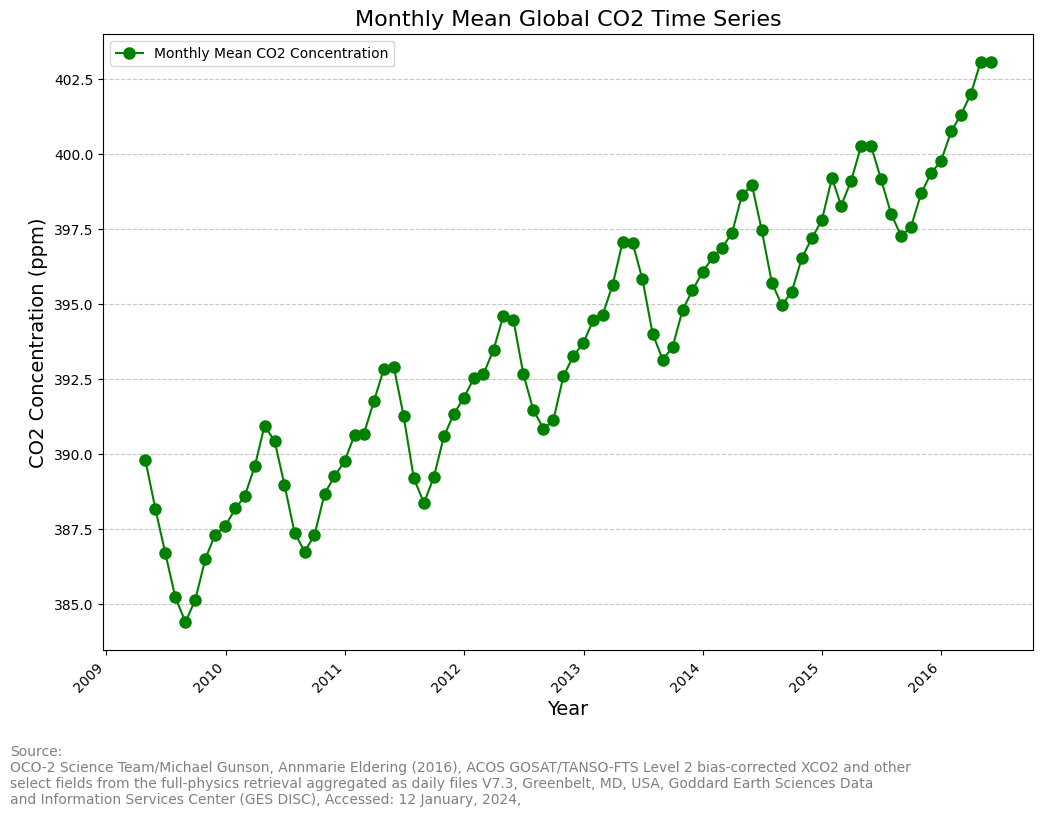

In [6]:
# Plot monthly mean time series
plt.figure(figsize=(12, 8))
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='green', linestyle='-', marker='o', markersize=8)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Monthly Mean Global CO2 Time Series', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
source = '''Source:
OCO-2 Science Team/Michael Gunson, Annmarie Eldering (2016), ACOS GOSAT/TANSO-FTS Level 2 bias-corrected XCO2 and other 
select fields from the full-physics retrieval aggregated as daily files V7.3, Greenbelt, MD, USA, Goddard Earth Sciences Data
and Information Services Center (GES DISC), Accessed: 12 January, 2024,'''
plt.annotate(source, xy=(-0.1, -0.25), xycoords='axes fraction', ha='left', fontsize=10, color='gray')
plt.legend()
plt.show()

### Task 2

Modify the time series in the previous task, but use only good quality data.

A variable exists in the NetCDF files called xco2_quality_flag with binary values 1 and 0, with 1 indicating that the data has been flagged due to it being of lower quality.

In [7]:
# Only keep dataframe rows where quality is good. In this case, good data is represented binarily by 0.
df2 = df[df['xco2_quality_flag'] == 0]
print(df2.head())

                            Time  CO2 Levels   Latitude   Longitude  \
10 2016-05-22 00:33:36.408495665  403.143250  45.389202 -169.325775   
11 2016-05-22 00:33:54.845732212  404.346680  44.286148 -169.743088   
20 2016-05-22 00:34:36.442327976  403.280701  41.808075 -170.658035   
21 2016-05-22 00:34:40.940996170  403.413177  41.531422 -170.758743   
22 2016-05-22 00:34:45.660423279  403.567810  41.255894 -170.858719   

    xco2_quality_flag  
10                  0  
11                  0  
20                  0  
21                  0  
22                  0  


In [8]:
monthly_means = df2.resample('M', on='Time').mean()

/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_70638/1208018905.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means = df2.resample('M', on='Time').mean()


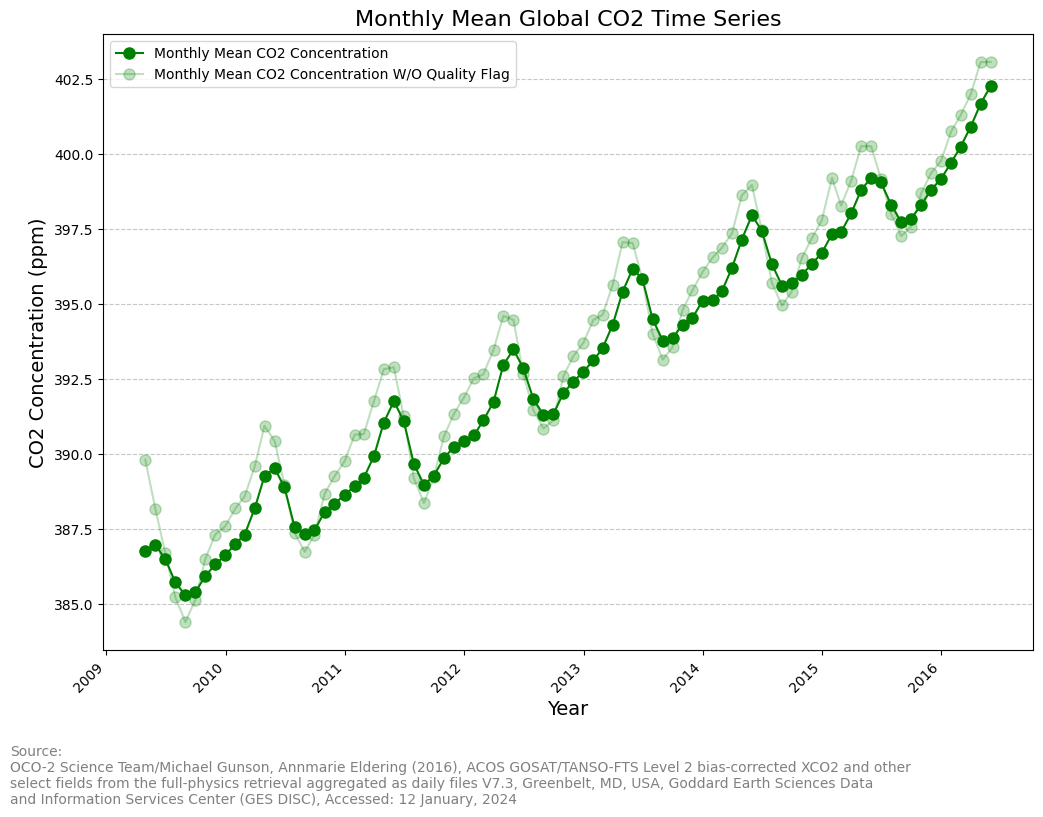

In [9]:
# Plot monthly mean time series
plt.figure(figsize=(12, 8))
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='green', linestyle='-', marker='o', markersize=8)
plt.plot(monthly_means_1.index, monthly_means_1['CO2 Levels'], label='Monthly Mean CO2 Concentration W/O Quality Flag', color='green', linestyle='-', marker='o', alpha = 0.25, markersize=8)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Monthly Mean Global CO2 Time Series', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
source = '''Source:
OCO-2 Science Team/Michael Gunson, Annmarie Eldering (2016), ACOS GOSAT/TANSO-FTS Level 2 bias-corrected XCO2 and other 
select fields from the full-physics retrieval aggregated as daily files V7.3, Greenbelt, MD, USA, Goddard Earth Sciences Data
and Information Services Center (GES DISC), Accessed: 12 January, 2024'''
plt.annotate(source, xy=(-0.1, -0.25), xycoords='axes fraction', ha='left', fontsize=10, color='gray')
plt.legend()
plt.show()

### Task 3

Bin the time seriesfor every 10 degrees in latitude and note any observations.

In [10]:
# Latitude bins for every 10 degrees
latitude_bins = np.arange(-90, 91, 10)
latitude_bins

array([-90, -80, -70, -60, -50, -40, -30, -20, -10,   0,  10,  20,  30,
        40,  50,  60,  70,  80,  90])

In [11]:
# Print the lowest and highest latitude values
lowest_latitude = df2['Latitude'].min()
highest_latitude = df2['Latitude'].max()

print("Lowest Latitude:", lowest_latitude)
print("Highest Latitude:", highest_latitude)

Lowest Latitude: -59.71723
Highest Latitude: 83.12107


In [12]:
# Define latitude bands for both northern and southern hemispheres
latitude_bands = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50),
                  (-10, 0), (-20, -10), (-30, -20), (-40, -30), (-50, -40)]

# Dictionary to store the results
monthly_means_dict = {}

# Loop over latitude bands
for i, (min_lat, max_lat) in enumerate(latitude_bands):
    temp_df = df2[(df2['Latitude'] >= min_lat) & (df2['Latitude'] < max_lat)]
    monthly_means_temp = temp_df.resample('ME', on='Time').mean()
    monthly_means_dict[i+1] = monthly_means_temp

# Now monthly_means_dict contains the monthly means for each latitude band

In [13]:
for i, band in enumerate(latitude_bands):
    print(f"monthly_means_dict[{i+1}]: {band}")

monthly_means_dict[1]: (0, 10)
monthly_means_dict[2]: (10, 20)
monthly_means_dict[3]: (20, 30)
monthly_means_dict[4]: (30, 40)
monthly_means_dict[5]: (40, 50)
monthly_means_dict[6]: (-10, 0)
monthly_means_dict[7]: (-20, -10)
monthly_means_dict[8]: (-30, -20)
monthly_means_dict[9]: (-40, -30)
monthly_means_dict[10]: (-50, -40)


/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_70638/4282601938.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


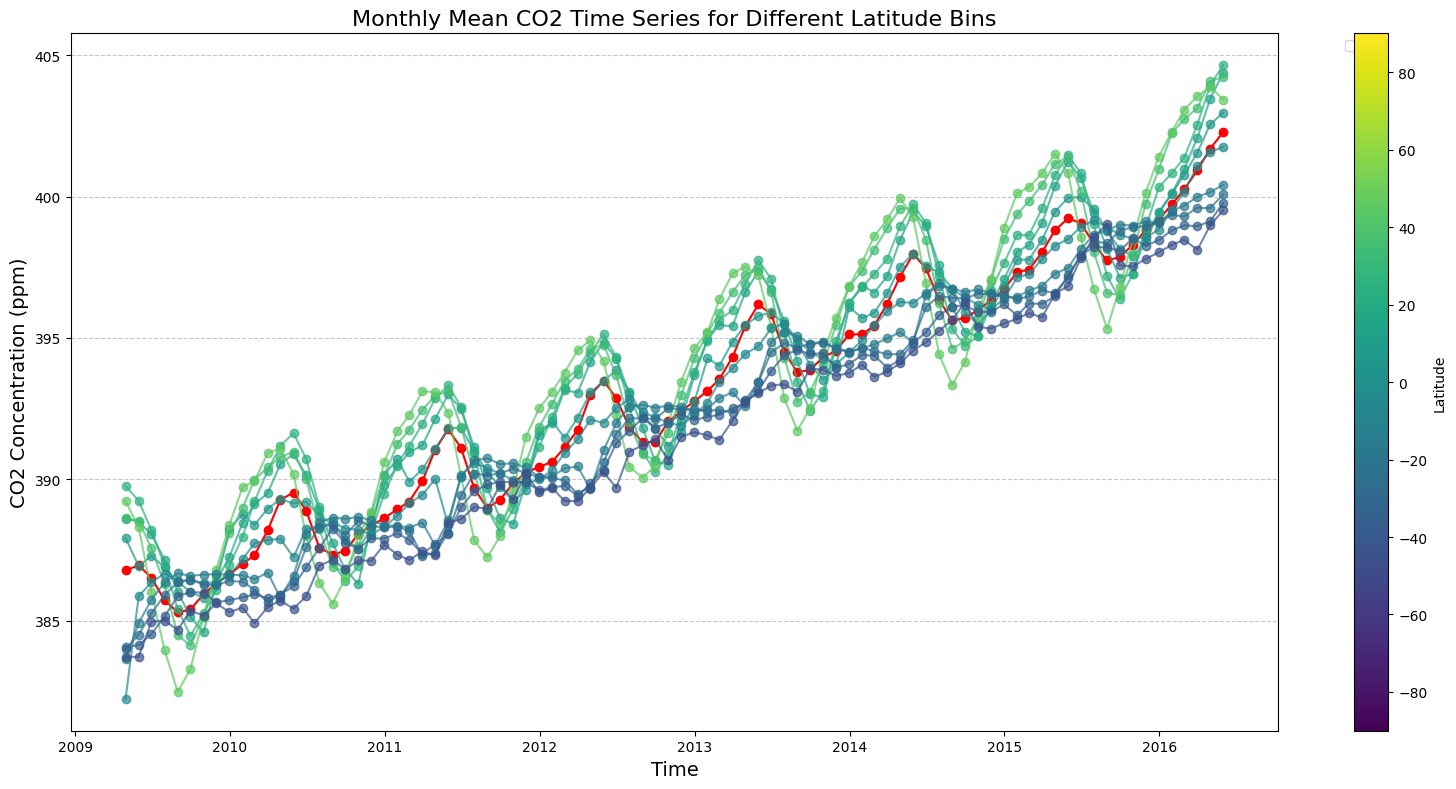

In [14]:
plt.figure(figsize=(16, 8))

# Creating the colormap
colormap = plt.get_cmap("viridis")
normalize = plt.Normalize(vmin=-90, vmax=90)

# Montly Mean XO2 emissions plot
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], color='Red', linestyle='-', marker='o')

# Mapping latitude bands to their corresponding colors
latitude_band_colors = {i + 1: colormap(normalize((latitude_bands[i][0] + latitude_bands[i][1]) / 2))
                        for i in range(len(latitude_bands))}

for i, data in monthly_means_dict.items():
     color = latitude_band_colors[i]
     plt.plot(data.index, data['CO2 Levels'], linestyle='-', marker='o', alpha=0.7, color=color)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
cbar = plt.colorbar(sm, label='Latitude', ax=plt.gca())

# Graph settings
plt.xlabel('Time', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Monthly Mean CO2 Time Series for Different Latitude Bins', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [15]:
'''# Add an estimate of which data belongs to land or ocean
monthly_means['land_sea'] = 'ocean'
monthly_means.loc[monthly_means['Latitude'] > 0, 'land_sea'] = 'land'

# Assign 
ocean_data = monthly_means[monthly_means['land_sea'] == 'ocean']s
land_data = monthly_means[monthly_means['land_sea'] == 'land']

monthly_means'''

"# Add an estimate of which data belongs to land or ocean\nmonthly_means['land_sea'] = 'ocean'\nmonthly_means.loc[monthly_means['Latitude'] > 0, 'land_sea'] = 'land'\n\n# Assign \nocean_data = monthly_means[monthly_means['land_sea'] == 'ocean']s\nland_data = monthly_means[monthly_means['land_sea'] == 'land']\n\nmonthly_means"

In [16]:
'''# Plot time series for ocean
plt.figure(figsize=(12, 5))
plt.plot(ocean_data.index, ocean_data['CO2 Levels'], label='Ocean Areas', color='blue', linestyle='-', marker='o', alpha=0.6)
plt.plot(land_data.index, land_data['CO2 Levels'], label='Land Areas', color='green', linestyle='-', marker='o', alpha=0.6)
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='Red', linestyle='-')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('Monthly Mean CO2 Time Series for Ocean Areas', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()'''

"# Plot time series for ocean\nplt.figure(figsize=(12, 5))\nplt.plot(ocean_data.index, ocean_data['CO2 Levels'], label='Ocean Areas', color='blue', linestyle='-', marker='o', alpha=0.6)\nplt.plot(land_data.index, land_data['CO2 Levels'], label='Land Areas', color='green', linestyle='-', marker='o', alpha=0.6)\nplt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='Red', linestyle='-')\nplt.xlabel('Year', fontsize=14)\nplt.ylabel('CO2 Concentration (ppm)', fontsize=14)\nplt.title('Monthly Mean CO2 Time Series for Ocean Areas', fontsize=16)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.legend()\nplt.show()"

## Task 4

- Create 4 global graphs of 4 days, one for each season

In [17]:
print("Time shape:", time_var.shape)
print("XCO2 shape:", xco2_var.shape)
print("Quality Flag shape:", xco2_qf_var.shape)
#print("Latitude shape:", latitude_var.shape)

Time shape: (722,)
XCO2 shape: (722,)
Quality Flag shape: (722,)


In [18]:
dfs[6]['Time']

0      2016-05-28 00:20:04.448305130
1      2016-05-28 00:20:08.946731567
2      2016-05-28 00:20:13.666440487
3      2016-05-28 00:20:18.165913105
4      2016-05-28 00:20:22.885662317
                    ...             
1093   2016-05-28 23:51:44.097278357
1094   2016-05-28 23:51:48.817027569
1095   2016-05-28 23:51:53.315413952
1096   2016-05-28 23:51:58.036088467
1097   2016-05-28 23:52:02.534555197
Name: Time, Length: 1098, dtype: datetime64[ns]

In [19]:
# Select 4 days

# Autumn season - 2014-10-18
# Winter season - 2015-12-02
# Spring season - 2012-04-28
# Summer season - 2009-07-27

# Window of 10 days for each season
autumn_start_date = pd.Timestamp('2014-10-18')
autumn_end_date = pd.Timestamp('2014-10-28')
autumn_date = pd.date_range(start = autumn_start_date, end = autumn_end_date)

winter_start_date = pd.Timestamp('2015-12-02')
winter_end_date = pd.Timestamp('2015-12-12')
winter_date = pd.date_range(start = winter_start_date, end = winter_end_date)

spring_start_date = pd.Timestamp('2012-04-28')
spring_end_date = pd.Timestamp('2012-05-08')
spring_date = pd.date_range(start = spring_start_date, end = spring_end_date)


summer_start_date = pd.Timestamp('2009-07-27')
summer_end_date = pd.Timestamp('2009-08-05')
summer_date = pd.date_range(start = summer_start_date, end = summer_end_date)

In [20]:
# Iterate over each selected date
'''for selected_date in selected_dates:
    filtered_data = pd.concat([df[df['Time'].dt.date == selected_date.date()] for df in dfs])
    #  print(filtered_data["CO2 Levels"].head())
    plt.figure(figsize=(18, 6))
    plt.plot(filtered_data['Time'], filtered_data['CO2 Levels'], marker='o')
    plt.xlabel('Time')
    plt.ylabel('XCO2 Concentration')
    plt.title(f'Time Series of XCO2 - {selected_date.date()}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()'''

'for selected_date in selected_dates:\n    filtered_data = pd.concat([df[df[\'Time\'].dt.date == selected_date.date()] for df in dfs])\n    #  print(filtered_data["CO2 Levels"].head())\n    plt.figure(figsize=(18, 6))\n    plt.plot(filtered_data[\'Time\'], filtered_data[\'CO2 Levels\'], marker=\'o\')\n    plt.xlabel(\'Time\')\n    plt.ylabel(\'XCO2 Concentration\')\n    plt.title(f\'Time Series of XCO2 - {selected_date.date()}\')\n    plt.grid(axis=\'y\', linestyle=\'--\', alpha=0.7)\n    plt.show()'

## Task 5

Using the 4 dates, focus on a particular region to plot the data

Modification: Focus on a particular window of time. Since specific areas may or may not have data at that particular time, it is important to get a window of time.

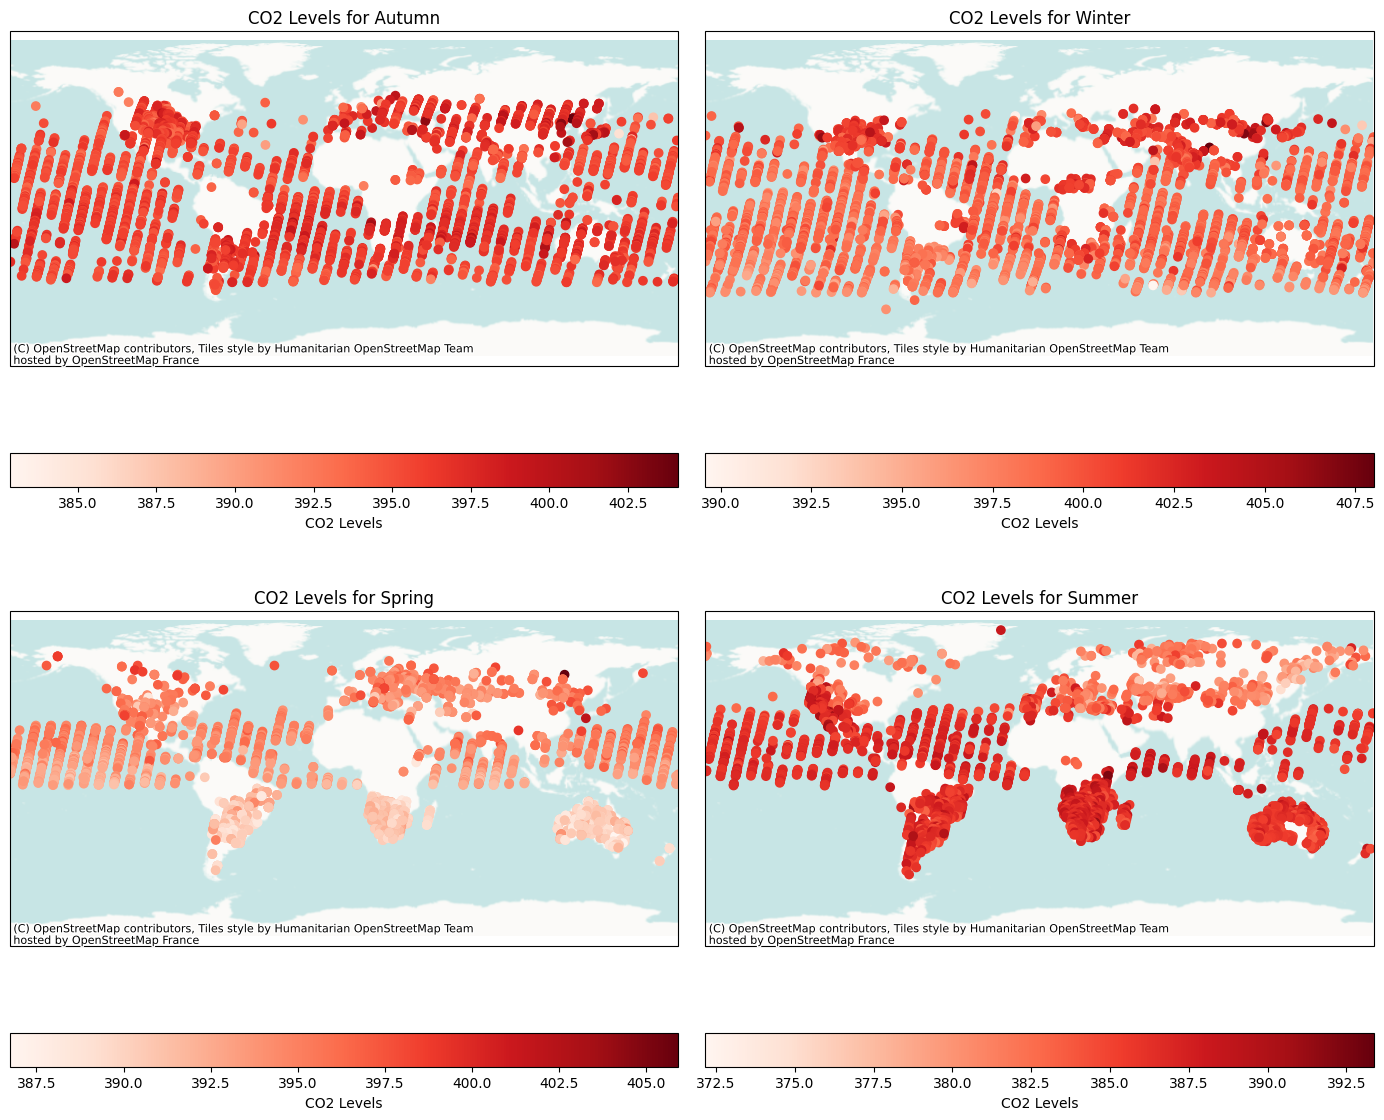

In [21]:
# Define the bounding box for the whole world
min_lon, max_lon = -180, 180
min_lat, max_lat = -90, 90

# Create a figure with plots for each season
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 12))

# Add contextily basemap to each plot
for ax in axs.flat:
    ax.set_extent([min_lon, max_lon, min_lat, max_lat])
    ctx.add_basemap(ax, crs=ccrs.PlateCarree(), alpha=0.5)

# Plot CO2 levels for each season
seasons = ["Autumn", "Winter", "Spring", "Summer"]
start_dates = [autumn_start_date, winter_start_date, spring_start_date, summer_start_date]
end_dates = [autumn_end_date, winter_end_date, spring_end_date, summer_end_date]

for ax, season, start_date, end_date in zip(axs.flat, seasons, start_dates, end_dates):
    # Filter data for the specific window
    filtered_data = df2[(df2['Time'] >= start_date) & (df2['Time'] <= end_date)]
    
    # Plot CO2 levels for the window
    ax.scatter(filtered_data["Longitude"], filtered_data["Latitude"], c=filtered_data["CO2 Levels"], cmap='Reds')
    ax.set_title(f'CO2 Levels for {season}')

    # Add colorbar for each plot
    colormap = plt.get_cmap("Reds")
    normalize = plt.Normalize(filtered_data['CO2 Levels'].min(), filtered_data['CO2 Levels'].max())
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
    cbar = plt.colorbar(sm, ax=ax, label='CO2 Levels', orientation='horizontal')

plt.tight_layout()
plt.show()

In [22]:
# Filter data for each season
autumn_filtered_data = df2[(df2['Time'] >= autumn_start_date) & (df2['Time'] <= autumn_end_date)]
winter_filtered_data = df2[(df2['Time'] >= winter_start_date) & (df2['Time'] <= winter_end_date)]
spring_filtered_data = df2[(df2['Time'] >= spring_start_date) & (df2['Time'] <= spring_end_date)]
summer_filtered_data = df2[(df2['Time'] >= summer_start_date) & (df2['Time'] <= summer_end_date)]

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

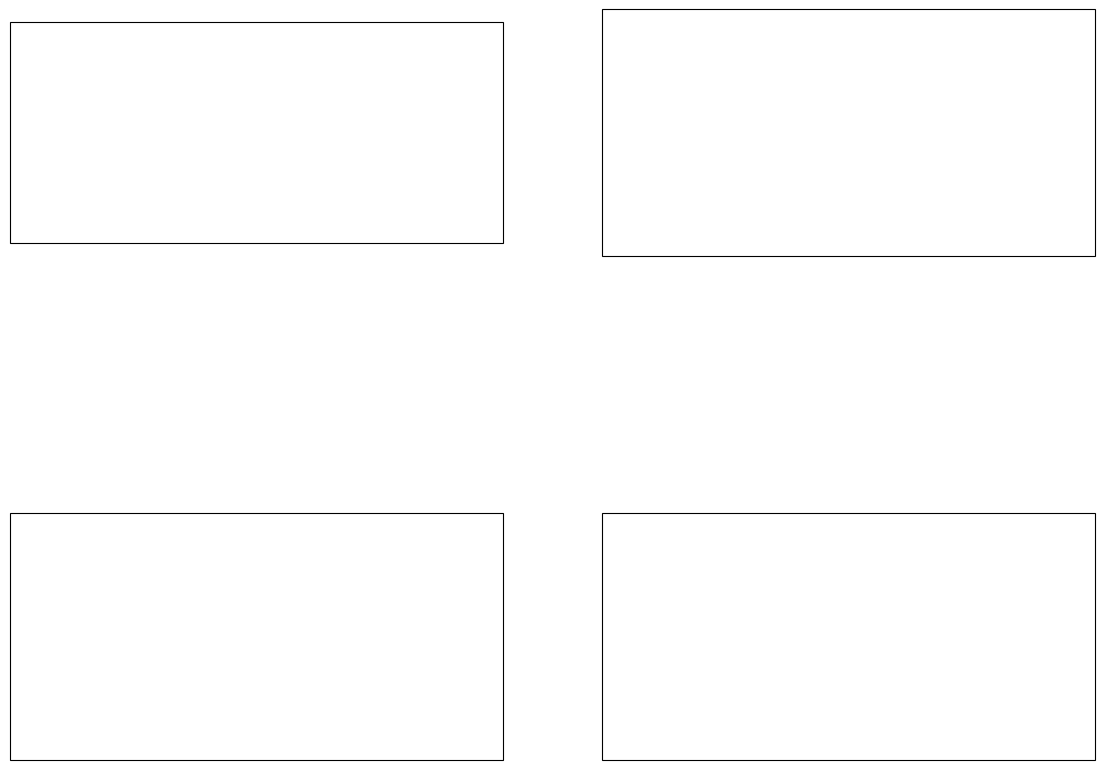

In [23]:
# Bounding box for the area northeast of Denver, CO
min_lat, min_lon = (39.638, -105.111)
max_lat, max_lon = (41.016, -102.034752)

# Create figure and axes
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 12))

# Add contextily basemap to each plot
for ax in axs.flat:
    ax.set_extent([min_lon, max_lon, min_lat, max_lat])
    ctx.add_basemap(ax, crs={'init': 'epsg:4326'}, alpha=0.5)

# Filtered data and season names
filtered_data_list = [autumn_filtered_data, winter_filtered_data, spring_filtered_data, summer_filtered_data]
seasons = ["Autumn", "Winter", "Spring", "Summer"]

# Plot CO2 levels for each season
for ax, season, filtered_data in zip(axs.flat, seasons, filtered_data_list):
    ax.scatter(filtered_data["Longitude"], filtered_data["Latitude"], c=filtered_data["CO2 Levels"], cmap='Reds')
    ax.set_title(f'CO2 Levels for {season}')

    # Add colorbar for each plot
    colormap = plt.get_cmap("Reds")
    normalize = plt.Normalize(vmin=350, vmax=400)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
    cbar = plt.colorbar(sm, ax=ax, label='CO2 Levels', orientation='horizontal')

plt.tight_layout()
plt.show()

## TASK 6

- Fix data errors in previous assignments
    - Use data w/ QF for sounding data (Task 5)
    - Use uniform colorbar for Colorado soundings (Task 5)

- Create a time series for just Colorado

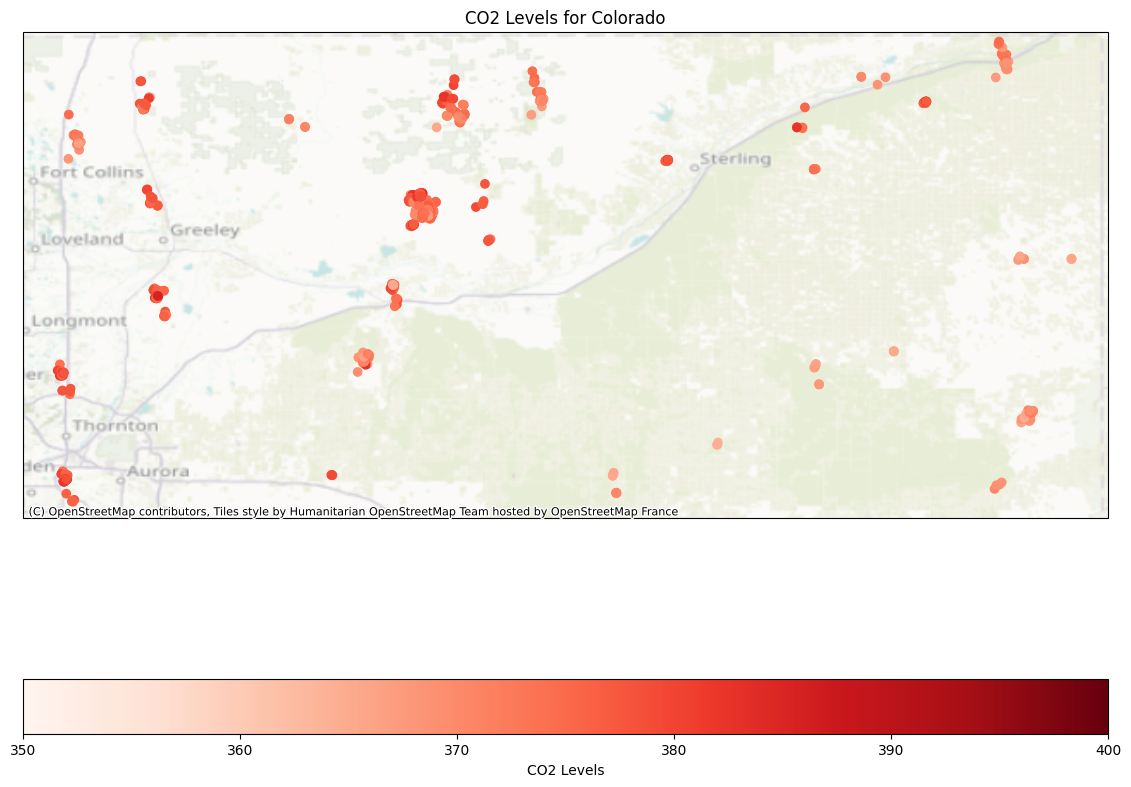

In [ ]:
# Bounding box for the area northeast of Denver, CO
min_lat, min_lon = (39.638, -105.111)
max_lat, max_lon = (41.016, -102.034752)

# Create figure and axes
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 14))

# Create map of Colorado
ax.set_extent([min_lon, max_lon, min_lat, max_lat])
ctx.add_basemap(ax, crs={'init':'epsg:4326'}, alpha=0.5)

# Create a visualization for CO2 emissions in Colorado for the entire timeframe for which the data was collected
ax.scatter(df2["Longitude"], df2["Latitude"], c=df2["CO2 Levels"], cmap='Reds')
ax.set_title(f'CO2 Levels for Colorado')

# Add colorbar for the plot
colormap = plt.get_cmap("Reds")
normalize = plt.Normalize(vmin=350, vmax=400)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
cbar = plt.colorbar(sm, ax=ax, label='CO2 Levels', orientation='horizontal')

plt.show()

In [ ]:
'''
filtered_data1 = df2[(df2['Latitude'] >= min_lat) & (df2['Latitude'] < max_lat)]
filtered_data2 = df2[(df2['Longitude'] >= min_lon) & (df2['Longitude'] < max_lon)]
combined_data = pd.merge(filtered_data1, filtered_data2, how='inner')
monthly_means_fd = combined_data.resample('M', on='Time').mean()

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='red', linestyle='-', marker='o')
plt.plot(monthly_means_fd.index, monthly_means_fd['CO2 Levels'], label='Monthly Mean CO2 Concentration for NE Colorado', color='salmon', marker='o', linestyle='-', alpha=0.5)
plt.title('Time Series of CO2 Levels for Area Northeast of Denver, CO')
plt.xlabel('Time')
plt.ylabel('CO2 Levels')
plt.grid(True)
plt.legend()
plt.show()
'''

"\nfiltered_data1 = df2[(df2['Latitude'] >= min_lat) & (df2['Latitude'] < max_lat)]\nfiltered_data2 = df2[(df2['Longitude'] >= min_lon) & (df2['Longitude'] < max_lon)]\ncombined_data = pd.merge(filtered_data1, filtered_data2, how='inner')\nmonthly_means_fd = combined_data.resample('M', on='Time').mean()\n\n# Create a time series plot\nplt.figure(figsize=(12, 6))\nplt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='red', linestyle='-', marker='o')\nplt.plot(monthly_means_fd.index, monthly_means_fd['CO2 Levels'], label='Monthly Mean CO2 Concentration for NE Colorado', color='salmon', marker='o', linestyle='-', alpha=0.5)\nplt.title('Time Series of CO2 Levels for Area Northeast of Denver, CO')\nplt.xlabel('Time')\nplt.ylabel('CO2 Levels')\nplt.grid(True)\nplt.legend()\nplt.show()\n"

/var/folders/_6/ng9nyncd4fj46czxf2xywqc40000gp/T/ipykernel_89363/162439289.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_means_fd = combined_data.resample('M', on='Time').mean()


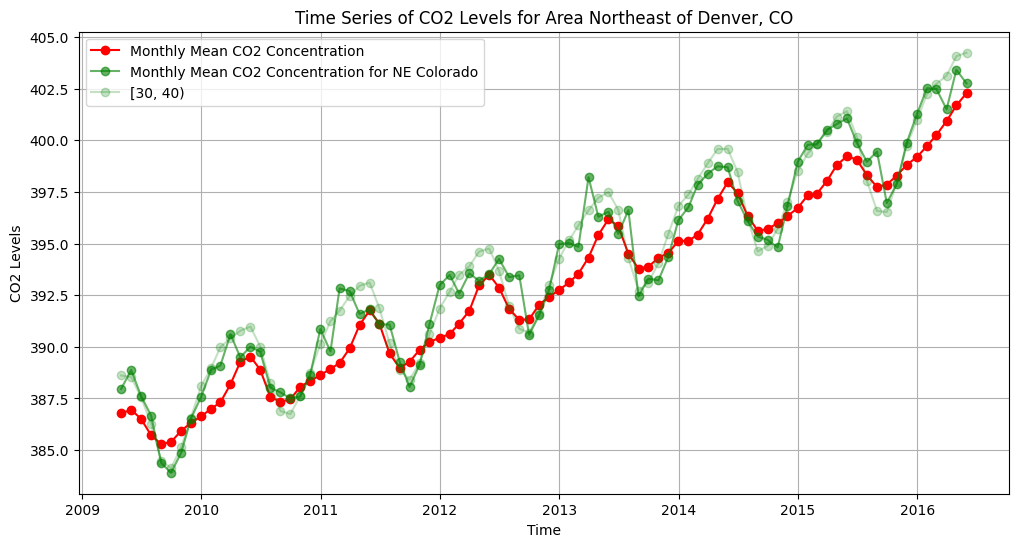

In [ ]:
# Updating bounding box for all of Colorado
new_min_lat, new_min_lon = (37.003, -109.034)
new_max_lat, new_max_lon = (40.972, -102.057)

# temp_df9 = df2[(df2['Latitude'] >= 80) & (df2['Latitude'] < 90)]
# monthly_means_subset9 = temp_df9.resample('M', on='Time').mean()
# plt.plot(monthly_means_subsetn1.index, monthly_means_subsetn1['CO2 Levels'], label='[-10, 0)', linestyle='-', marker='o', markersize=8, alpha=0.3)
# filtered_data = df2[(df2['Latitude'] >= min_lat) & (df2['Latitude'] <= max_lat) & (df2['Longitude'] >= min_lon) & (df2['Longitude'] <= max_lon)]

filtered_data1 = df2[(df2['Latitude'] >= new_min_lat) & (df2['Latitude'] < new_max_lat)]
filtered_data2 = df2[(df2['Longitude'] >= new_min_lon) & (df2['Longitude'] < new_max_lon)]
combined_data = pd.merge(filtered_data1, filtered_data2, how='inner')
monthly_means_fd = combined_data.resample('M', on='Time').mean()



# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_means.index, monthly_means['CO2 Levels'], label='Monthly Mean CO2 Concentration', color='red', linestyle='-', marker='o')
plt.plot(monthly_means_fd.index, monthly_means_fd['CO2 Levels'], label='Monthly Mean CO2 Concentration for NE Colorado', color='green', marker='o', linestyle='-', alpha=0.6)
plt.plot(monthly_means_dict[4].index, monthly_means_dict[4]['CO2 Levels'], label='[30, 40)', linestyle='-', marker='o', color='green', alpha=0.23)
plt.title('Time Series of CO2 Levels for Area Northeast of Denver, CO')
plt.xlabel('Time')
plt.ylabel('CO2 Levels')
plt.grid(True)
plt.legend()
plt.show()